<a href="https://colab.research.google.com/github/merlynmp/Web3-Vulnerabilities/blob/main/Web3_Vulnerabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Copy of compiled_risk_data.xlsx")

In [ ]:
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                1093 non-null   object
 1   Smart contract address                      1093 non-null   object
 2   Blog post link                              1093 non-null   object
 3   Audit website                               1093 non-null   object
 4   Chain                                       1093 non-null   object
 5   Is_closed_source                            1093 non-null   bool  
 6   hidden_owner                                1093 non-null   bool  
 7   anti_whale_modifiable                       1093 non-null   bool  
 8   Is_anti_whale                               1093 non-null   bool  
 9   Is_honeypot                                 1093 non-null   bool  
 10  buy_tax                 

In [ ]:
df_one = df.drop(columns = ['project_name', 'Smart contract address', 'Blog post link', 'Audit website', 'Summary/rationale of risk tags marked true'])

In [ ]:
df_one.head()

,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
0,Ethereum,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,True,False,False,False
1,Ethereum,False,False,True,True,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,True
2,Ethereum,True,False,False,True,False,False,False,True,False,...,False,False,True,False,True,False,False,False,True,True
3,Ethereum,True,False,False,False,True,False,True,False,False,...,True,False,True,False,False,True,True,False,False,True
4,Ethereum,True,False,True,False,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,True


In [ ]:
frequencies = df_one[df_one.drop('Chain', axis = 1)].apply(lambda x: x.value_counts()).loc[True]

In [ ]:
df_one.isnull().values.any()

False

In [ ]:
frequencies

Chain                                NaN
Is_closed_source                   146.0
hidden_owner                       164.0
anti_whale_modifiable              122.0
Is_anti_whale                      155.0
Is_honeypot                         94.0
buy_tax                            128.0
sell_tax                           126.0
slippage_modifiable                149.0
Is_blacklisted                      81.0
can_take_back_ownership            194.0
owner_change_balance               222.0
is_airdrop_scam                     69.0
selfdestruct                       116.0
trust_list                         149.0
is_whitelisted                     109.0
is_fake_token                       90.0
illegal_unicode                     62.0
exploitation                       468.0
bad_contract                       373.0
reusing_state_variable             124.0
encode_packed_collision             81.0
encode_packed_parameters            87.0
centralized_risk_medium            283.0
centralized_risk

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-12-a1021f9b50d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = frequencies.index, y = frequencies.values, palette = 'viridis')


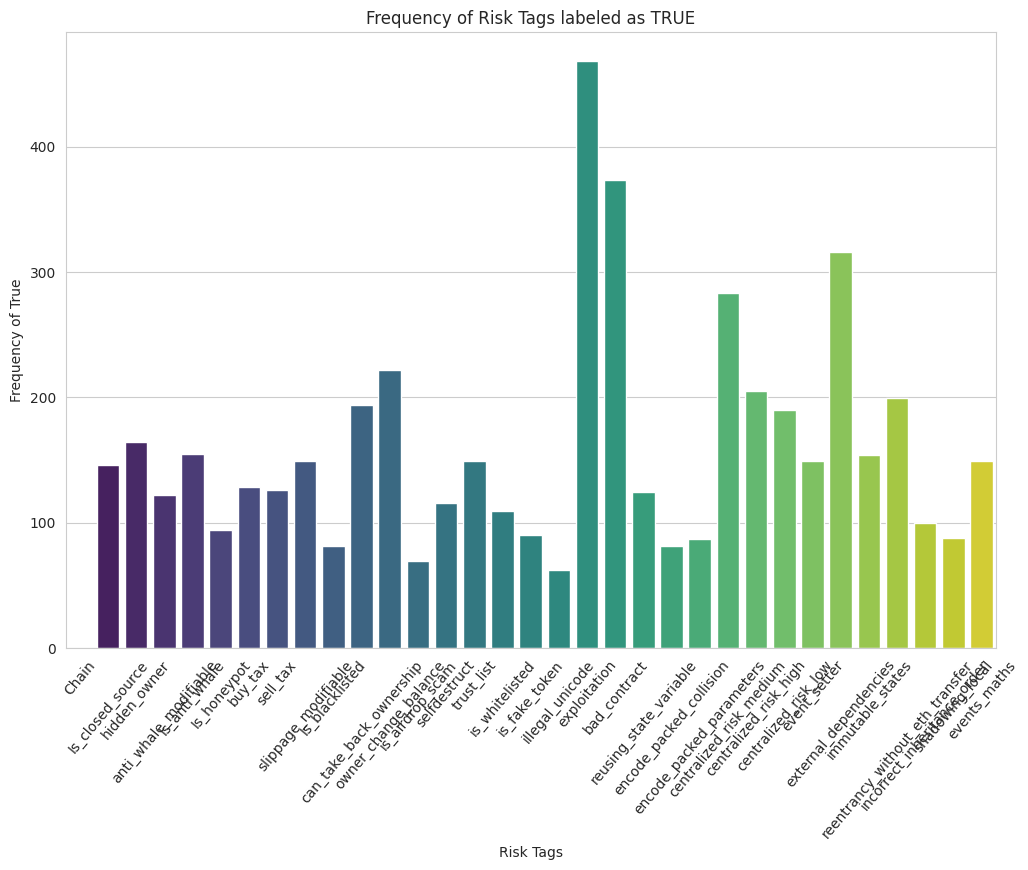

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(x = frequencies.index, y = frequencies.values, palette = 'viridis')
plt.title("Frequency of Risk Tags labeled as TRUE")
plt.xlabel("Risk Tags")
plt.ylabel("Frequency of True")
plt.xticks(rotation = 50)
plt.show()

<Axes: xlabel='Chain', ylabel='Count'>

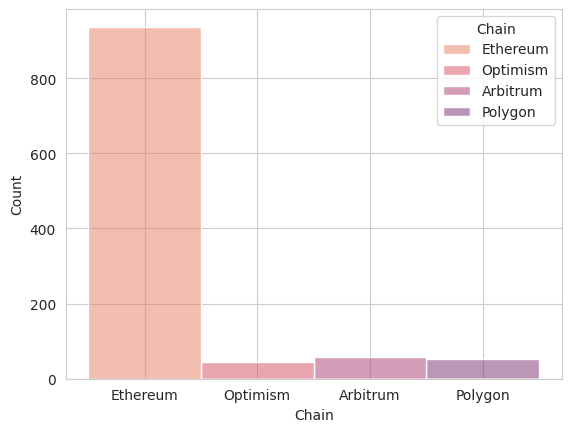

In [ ]:
sns.histplot(data = df_one, x = "Chain", hue = "Chain", palette = "flare")

In [ ]:
import scipy.stats as stats
import numpy as np

In [ ]:
def phi(x, y):

  contingency_table = pd.crosstab(x,y)

  chi = stats.chi2_contingency(contingency_table, correction = False)[0]

  n = np.sum(np.sum(contingency_table))

  phi_2 = np.sqrt(chi / n)

  return phi_2

In [ ]:
phi_store = phi(df_one['Is_honeypot'], df_one['anti_whale_modifiable'])

print(f"Test: {phi_store}")

Test: 0.43014356785902874


In [ ]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']

In [ ]:
risk_df = df_one[risk_columns]

phi_matrix = pd.DataFrame(index = risk_df.columns, columns = risk_df.columns)

for x in risk_df.columns:
  for y in risk_df.columns:
    phi_matrix.loc[x,y] = phi(risk_df[x], risk_df[y])

In [ ]:
phi_matrix

,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.377241,0.330545,0.295222,0.378356,0.325367,0.380376,0.392646,0.350922,0.268073,...,0.154701,0.210932,0.188913,0.353457,0.141124,0.258405,0.267738,0.341803,0.368141,0.282918
hidden_owner,0.377241,1.0,0.396169,0.35796,0.318871,0.476409,0.441975,0.400521,0.30169,0.361349,...,0.207843,0.32317,0.179091,0.295992,0.138936,0.234851,0.259852,0.328749,0.299391,0.206395
anti_whale_modifiable,0.330545,0.396169,1.0,0.522184,0.430144,0.467261,0.508889,0.604309,0.343386,0.337212,...,0.234878,0.343256,0.151742,0.367221,0.216158,0.290703,0.30709,0.391393,0.396996,0.324884
Is_anti_whale,0.295222,0.35796,0.522184,1.0,0.361724,0.504441,0.485596,0.480527,0.345546,0.271046,...,0.214742,0.274977,0.214919,0.327664,0.163063,0.363041,0.270344,0.344022,0.380936,0.304734
Is_honeypot,0.378356,0.318871,0.430144,0.361724,1.0,0.385562,0.42062,0.382178,0.473817,0.275998,...,0.19862,0.220442,0.229566,0.353648,0.200276,0.401028,0.328827,0.457276,0.436948,0.382178
buy_tax,0.325367,0.476409,0.467261,0.504441,0.385562,1.0,0.706026,0.468933,0.342314,0.344645,...,0.271892,0.306085,0.178313,0.303088,0.188246,0.359557,0.277935,0.377879,0.425561,0.327965
sell_tax,0.380376,0.441975,0.508889,0.485596,0.42062,0.706026,1.0,0.466078,0.379094,0.274693,...,0.309845,0.325616,0.204843,0.332492,0.199511,0.339642,0.334513,0.35248,0.430177,0.307444
slippage_modifiable,0.392646,0.400521,0.604309,0.480527,0.382178,0.468933,0.466078,1.0,0.315123,0.352786,...,0.233869,0.307745,0.204737,0.378341,0.217158,0.321931,0.351499,0.354841,0.431227,0.316176
Is_blacklisted,0.350922,0.30169,0.343386,0.345546,0.473817,0.342314,0.379094,0.315123,1.0,0.25251,...,0.151716,0.32934,0.165155,0.355839,0.204795,0.317108,0.273813,0.394809,0.455437,0.325302
can_take_back_ownership,0.268073,0.361349,0.337212,0.271046,0.275998,0.344645,0.274693,0.352786,0.25251,1.0,...,0.250195,0.353414,0.166029,0.269045,0.163273,0.314297,0.233799,0.367523,0.311373,0.234152


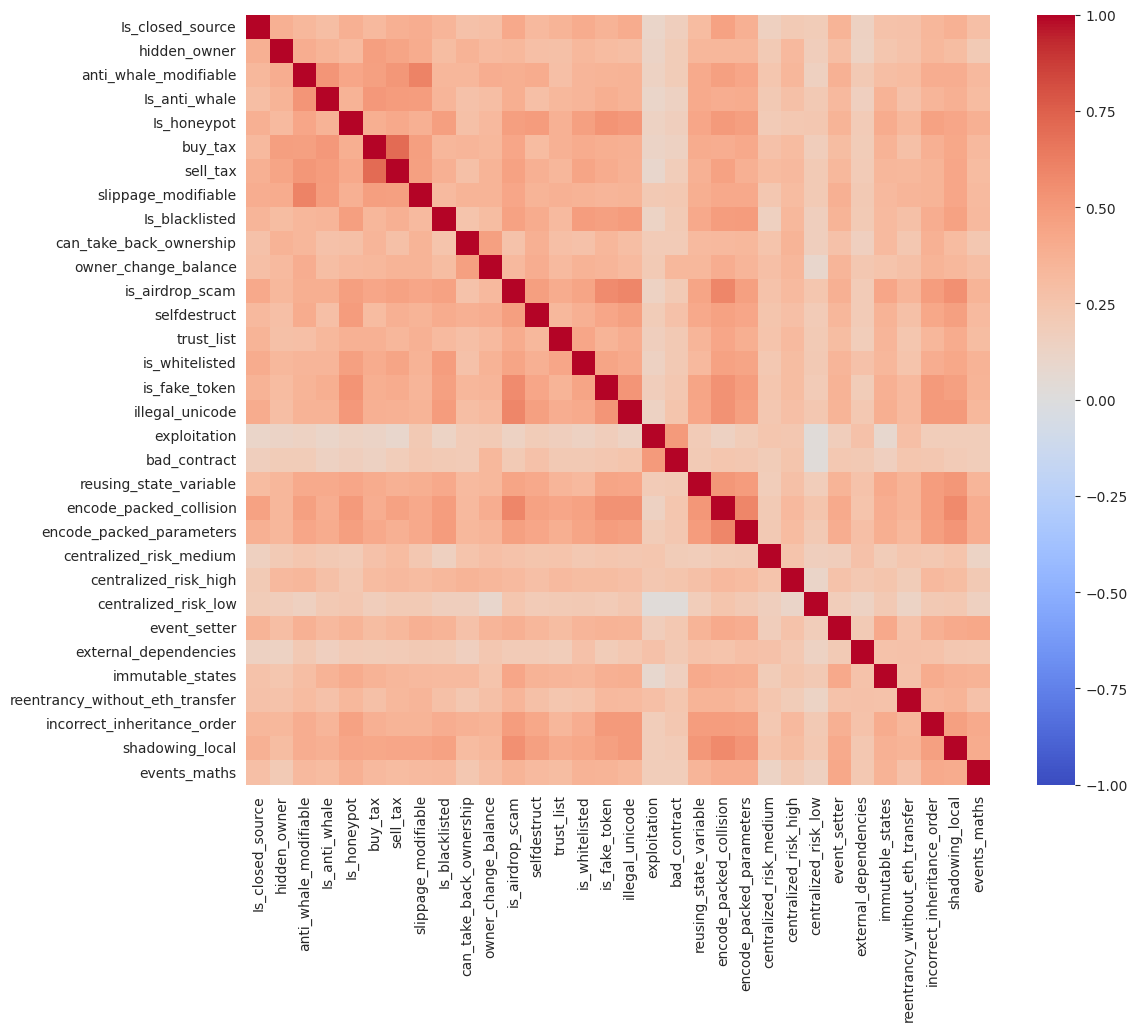

In [ ]:
plt.figure(figsize = (12,10))

sns.heatmap(phi_matrix.astype(float), annot = False, cmap = "coolwarm", vmax = 1, vmin = -1)
plt.show()

In [ ]:
#https://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values

phi_matrix_one = phi_matrix[(phi_matrix[risk_columns] >= 0.50) & (phi_matrix[risk_columns] <= 1.0)]

In [ ]:
phi_matrix_one

,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hidden_owner,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anti_whale_modifiable,NaN,NaN,1.0,0.522184,NaN,NaN,0.508889,0.604309,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Is_anti_whale,NaN,NaN,0.522184,1.0,NaN,0.504441,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Is_honeypot,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buy_tax,NaN,NaN,NaN,0.504441,NaN,1.0,0.706026,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sell_tax,NaN,NaN,0.508889,NaN,NaN,0.706026,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slippage_modifiable,NaN,NaN,0.604309,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Is_blacklisted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
can_take_back_ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import scipy.cluster.hierarchy as sch

from scipy.spatial.distance import pdist, squareform

from scipy.cluster.hierarchy import fcluster

In [ ]:
test_features = ['sell_tax', 'buy_tax']

#test_features = ['hidden_owner', 'Is_honeypot', 'exploitation']

selected_features = df_one[test_features].replace({True: 1, False: 0})

selected_features.head()

,sell_tax,buy_tax
0,0,0
1,0,1
2,0,0
3,1,0
4,0,0


In [ ]:
len(selected_features)

1093

In [ ]:
distance_matrix = pdist(selected_features, 'jaccard')

linkage_matrix = sch.linkage(distance_matrix, method = 'ward')

linkage_matrix = np.round(linkage_matrix).astype(int)

linkage_matrix = linkage_matrix.astype(float)

np.set_printoptions(precision=1, suppress=True)

linkage_matrix

array([[   0.,    2.,    0.,    2.],
       [   1.,    6.,    0.,    2.],
       [   4., 1093.,    0.,    3.],
       ...,
       [2069., 2077.,    3.,  126.],
       [2075., 2182.,    5.,  160.],
       [2181., 2183.,   16., 1093.]])

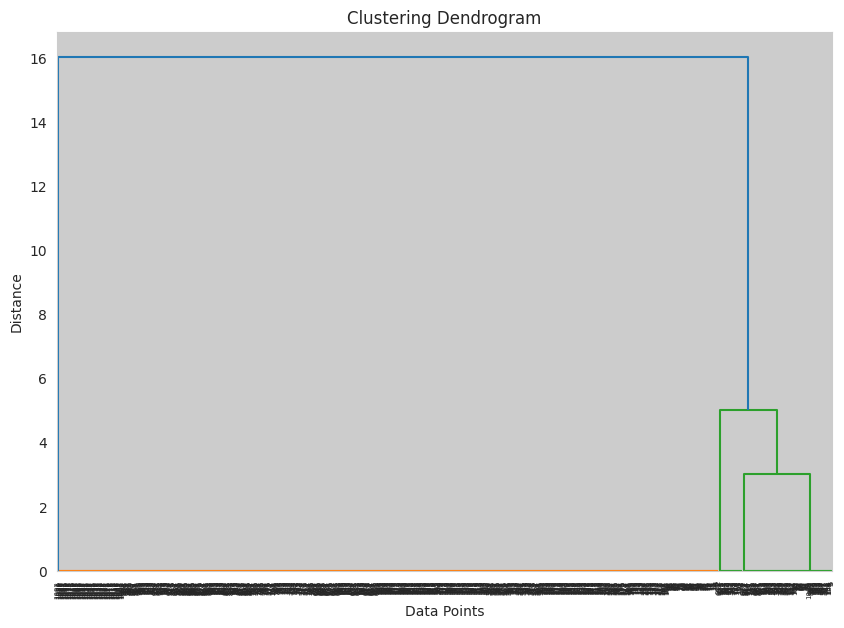

In [ ]:
plt.figure(figsize = (10,7))

dendogram = sch.dendrogram(linkage_matrix)

plt.title('Clustering Dendrogram')

plt.xlabel('Data Points')

plt.ylabel('Distance')

plt.show()

In [ ]:
cluster_labels = fcluster(linkage_matrix, t = 5, criterion = 'distance')

df_one['cluster'] = cluster_labels

cluster_summary = df_one[['sell_tax', 'buy_tax', 'cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])

cluster_summary

sell_tax                        buy_tax                       
            mean       std median count    mean       std median count
cluster                                                               
1         0.0000  0.000000    0.0   933     0.0  0.000000    0.0   933
2         0.7875  0.410361    1.0   160     0.8  0.401256    1.0   160

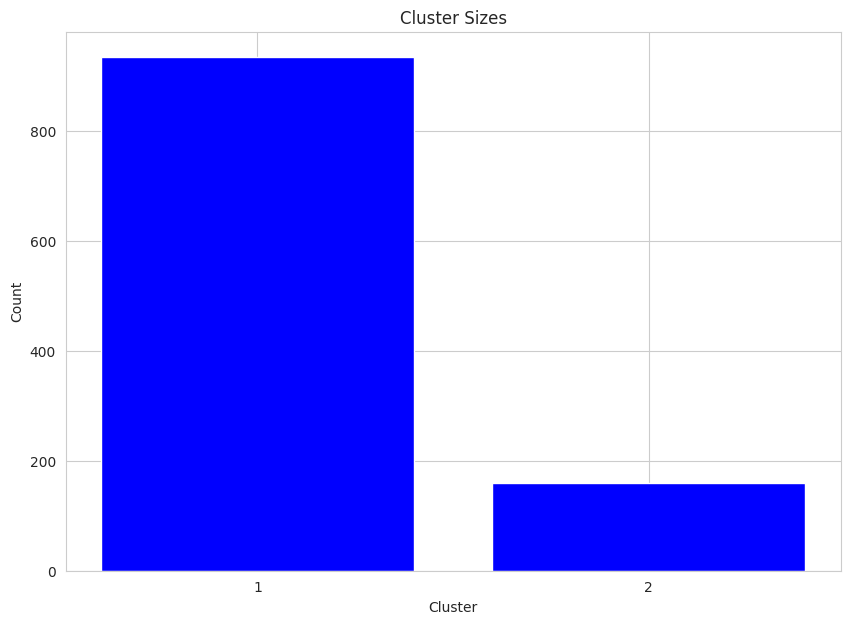

In [ ]:
plt.figure(figsize = (10,7))

plt.hist(cluster_labels, bins = np.arange(1, np.max(cluster_labels) + 2) - 0.5, rwidth = 0.8, color = 'blue')

plt.title('Cluster Sizes')

plt.xlabel('Cluster')

plt.ylabel('Count')

plt.xticks(np.arange(1, np.max(cluster_labels)+1))

plt.show()

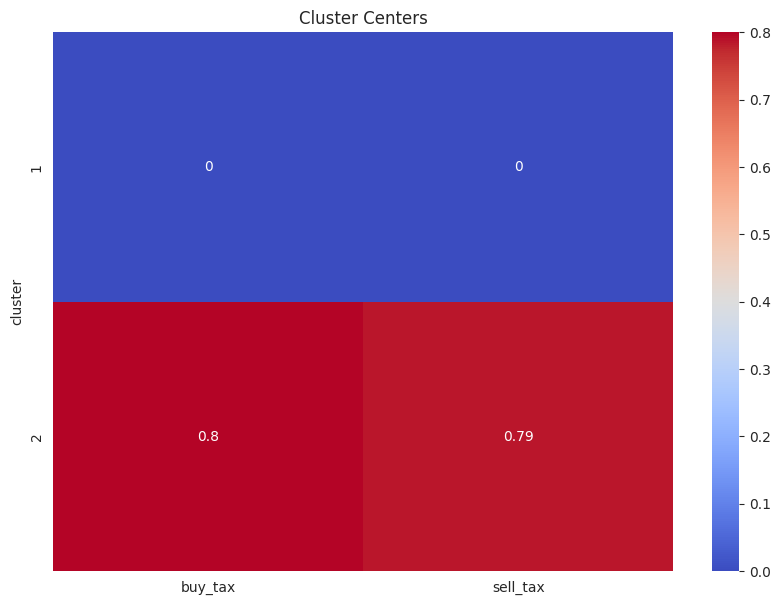

In [ ]:
cluster_centers = df_one[['buy_tax', 'sell_tax', 'cluster']].groupby('cluster').mean()

plt.figure(figsize = (10,7))

sns.heatmap(cluster_centers, annot = True, cmap = 'coolwarm')

plt.title('Cluster Centers')

plt.show()

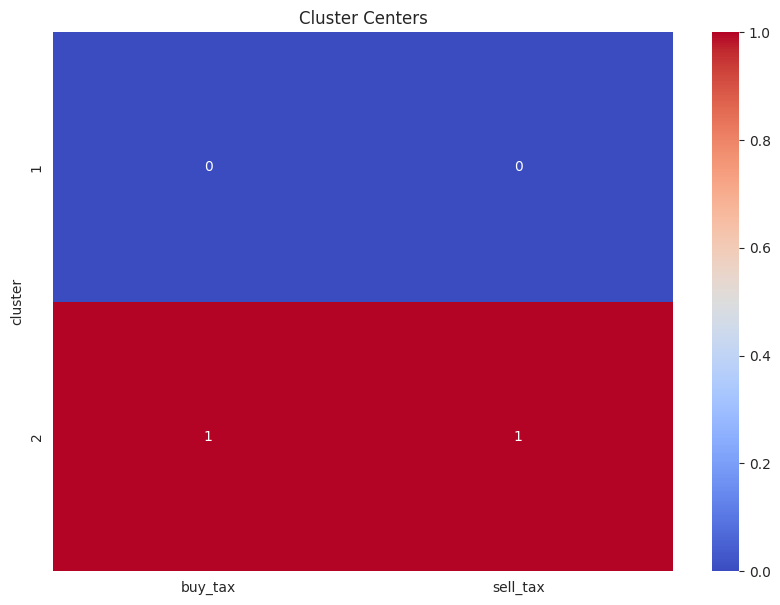

In [ ]:
cluster_centers = df_one[['buy_tax', 'sell_tax', 'cluster']].groupby('cluster').median()

plt.figure(figsize = (10,7))

sns.heatmap(cluster_centers, annot = True, cmap = 'coolwarm')

plt.title('Cluster Centers')

plt.show()

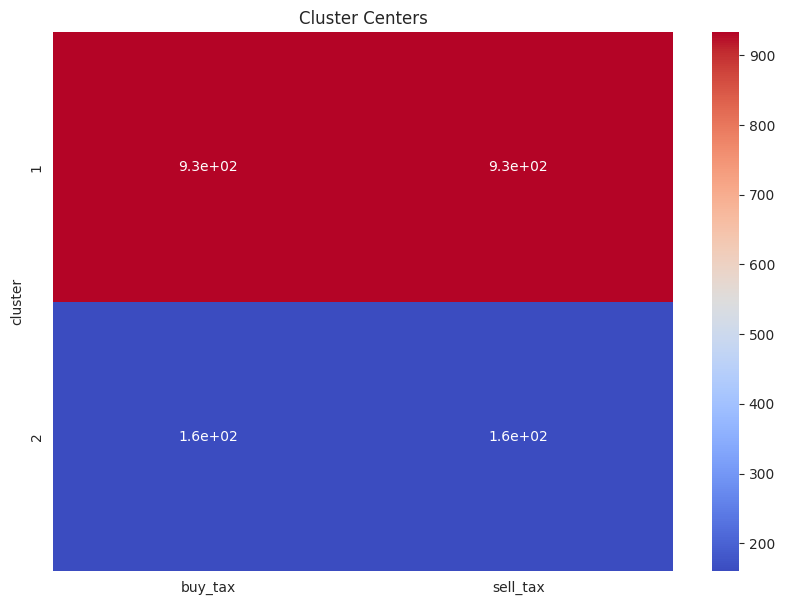

In [ ]:
cluster_centers = df_one[['buy_tax', 'sell_tax', 'cluster']].groupby('cluster').count()

plt.figure(figsize = (10,7))

sns.heatmap(cluster_centers, annot = True, cmap = 'coolwarm')

plt.title('Cluster Centers')

plt.show()